     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 column

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

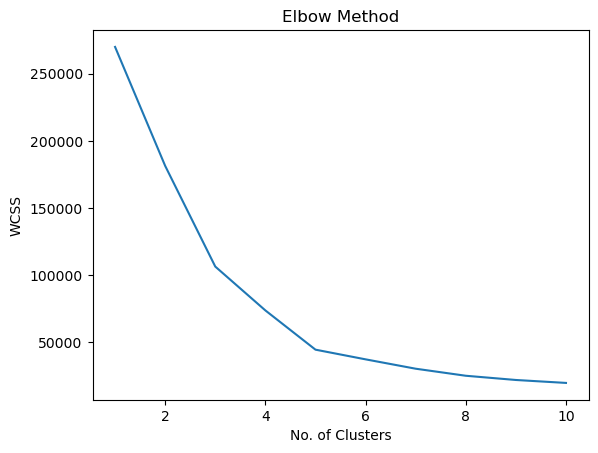

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


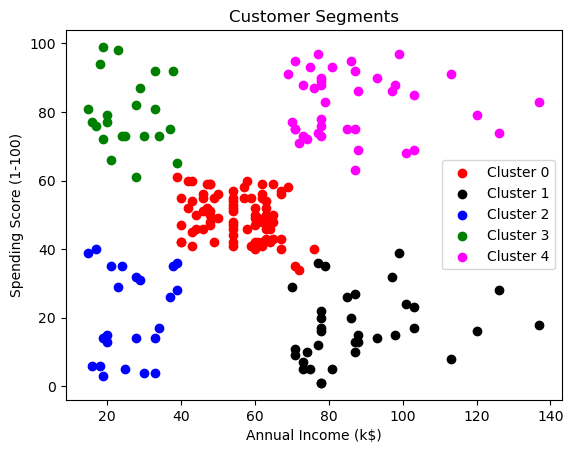

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

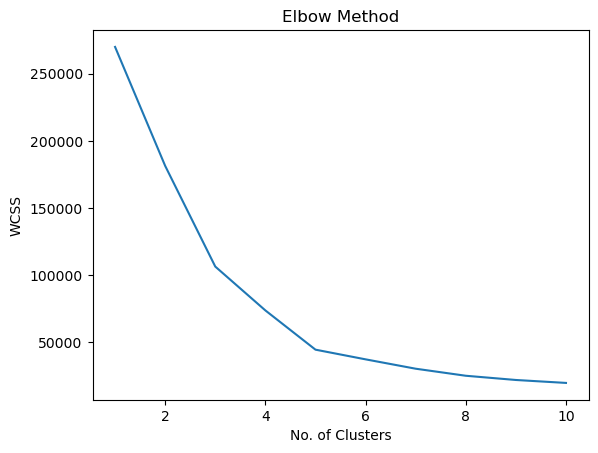

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [5]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
data = pd.read_csv("Mall_Customers.csv")
print(data)

# Display first few rows
data.head()

# Check data types and null values
data.info()
data.isnull().sum()

# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(data.iloc[:, 3:])
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Apply KMeans with optimal clusters
km = KMeans(n_clusters=5, random_state=42)
data['cluster'] = km.fit_predict(data.iloc[:, 3:])

# Segment data
df0 = data[data["cluster"] == 0]
df1 = data[data["cluster"] == 1]
df2 = data[data["cluster"] == 2]
df3 = data[data["cluster"] == 3]
df4 = data[data["cluster"] == 4]

# Visualize the clusters
plt.scatter(df0["Annual Income (k$)"], df0["Spending Score (1-100)"], c="red", label="Cluster 0")
plt.scatter(df1["Annual Income (k$)"], df1["Spending Score (1-100)"], c="black", label="Cluster 1")
plt.scatter(df2["Annual Income (k$)"], df2["Spending Score (1-100)"], c="blue", label="Cluster 2")
plt.scatter(df3["Annual Income (k$)"], df3["Spending Score (1-100)"], c="green", label="Cluster 3")
plt.scatter(df4["Annual Income (k$)"], df4["Spending Score (1-100)"], c="magenta", label="Cluster 4")

plt.legend()
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
data = pd.read_csv("Mall_Customers.csv")

# Display first few rows
data.head()

# Check data types and null values
data.info()
data.isnull().sum()

# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(data.iloc[:, 3:])
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Apply KMeans with optimal clusters
km = KMeans(n_clusters=5, random_state=42)
data['cluster'] = km.fit_predict(data.iloc[:, 3:])

# Segment data
df0 = data[data["cluster"] == 0]
df1 = data[data["cluster"] == 1]
df2 = data[data["cluster"] == 2]
df3 = data[data["cluster"] == 3]
df4 = data[data["cluster"] == 4]

# Visualize the clusters


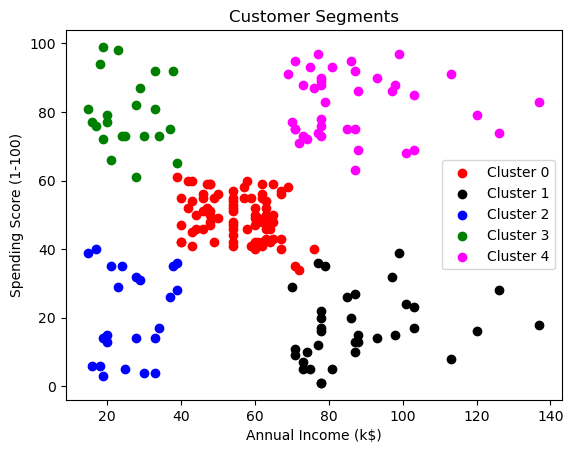

In [8]:
plt.scatter(df0["Annual Income (k$)"], df0["Spending Score (1-100)"], c="red", label="Cluster 0")
plt.scatter(df1["Annual Income (k$)"], df1["Spending Score (1-100)"], c="black", label="Cluster 1")
plt.scatter(df2["Annual Income (k$)"], df2["Spending Score (1-100)"], c="blue", label="Cluster 2")
plt.scatter(df3["Annual Income (k$)"], df3["Spending Score (1-100)"], c="green", label="Cluster 3")
plt.scatter(df4["Annual Income (k$)"], df4["Spending Score (1-100)"], c="magenta", label="Cluster 4")

plt.legend()
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [9]:
print("Varun A")
print(21222440178)

Varun A
21222440178
